In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image =cv2.imread(r"/content/img.jpg")

In [4]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

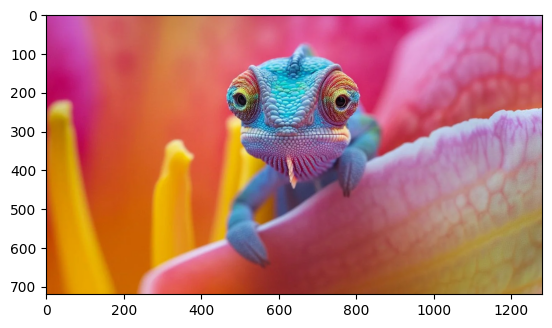

In [5]:
plt.imshow(image_rgb)
# plt.axis('off')  # Turn off axis numbers
plt.show()

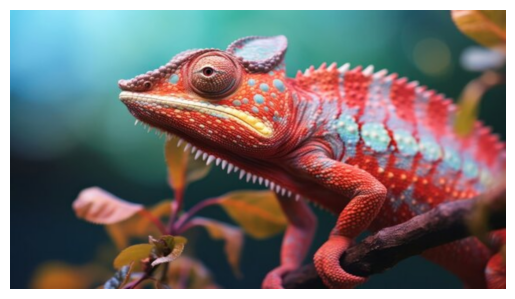

In [15]:
image2 = cv2.imread(r"/content/img2.jpg")
image2 = cv2.resize(image2, (image.shape[1], image.shape[0]))
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(image2_rgb)
plt.axis('off') # Turn off axis numbers
plt.show()

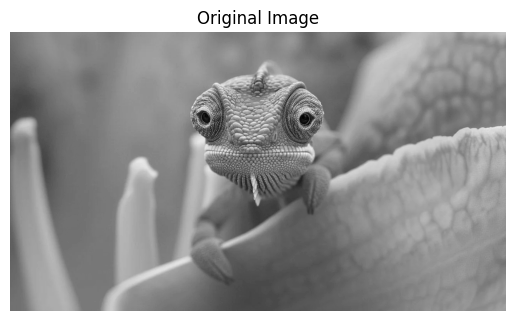

In [22]:
# Read the image in grayscale
image3 = cv2.imread(r"/content/img.jpg", cv2.IMREAD_GRAYSCALE)
# Display the original image
plt.imshow(image3, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

## Log Transformation

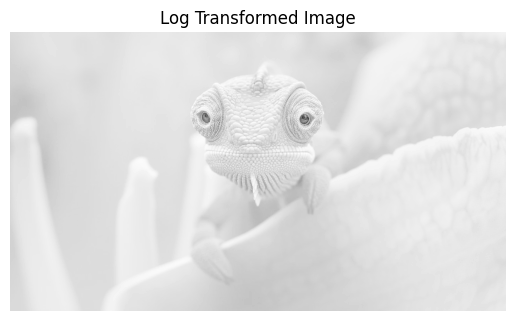

In [27]:
# Log transformation
c = 255 / np.log(1 + np.max(image3)) # Scaling constant
log_transformed = c * np.log(1 + image3)
# log_transformed = np.array(log_transformed, dtype=np.uint8)

# Display
plt.imshow(log_transformed, cmap='gray')
plt.title('Log Transformed Image')
plt.axis('off')
plt.show()

## Power-Law (Gamma) Transformation

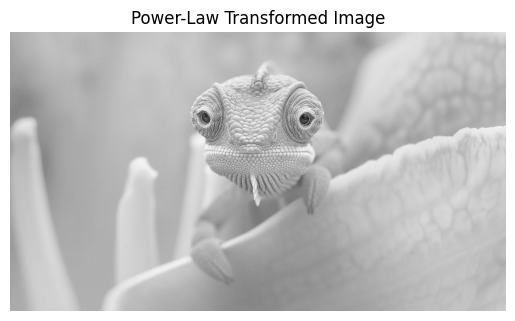

In [28]:
# Power-law (Gamma) transformation
gamma = 0.5
c = 255 / (np.max(image3) ** gamma)
power_law_transformed = c * (image3 ** gamma)

# Display
plt.imshow(power_law_transformed, cmap='gray')
plt.title('Power-Law Transformed Image')
plt.axis('off')
plt.show()

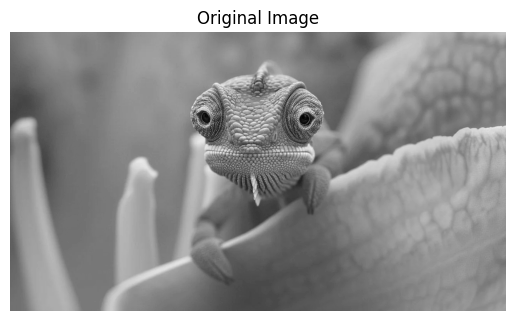

In [ ]:
image4 = cv2.imread(r"/content/img.jpg",cv2.IMREAD_GRAYSCALE)
plt.imshow(image4, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

### Perform Transformations on image using hardcoding with matrix multiplication of image and matrices of transformation

## Translation

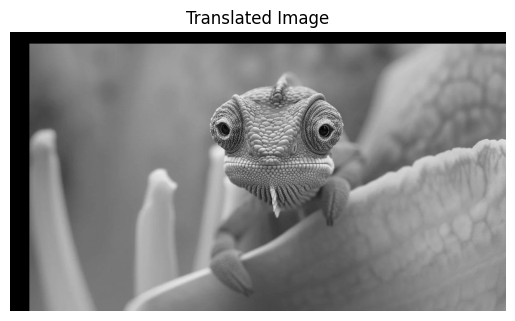

In [46]:
def translate_image(image, tx, ty):
  rows, cols = image.shape
  translation_matrix = np.array([[1, 0, tx],
  [0, 1, ty],
  [0, 0, 1]], dtype=np.float32)
  translated_image = cv2.warpPerspective(image, translation_matrix,(cols, rows))
  return translated_image

# Apply translation
translated_image = translate_image(image4, tx=50, ty=30)
plt.imshow(translated_image, cmap='gray')
plt.title('Translated Image')
plt.axis('off')
plt.show()

## Scaling


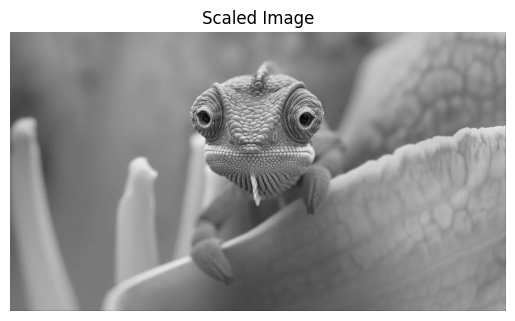

In [47]:
def scale_image(image, sx, sy):
  rows, cols = image.shape
  scaling_matrix = np.array([[sx, 0, 0],
  [0, sy, 0],
  [0, 0, 1]], dtype=np.float32)
  scaled_image = cv2.warpPerspective(image, scaling_matrix,(int(cols * sx), int(rows * sy)))
  return scaled_image
# Apply scaling
scaled_image = scale_image(image4, sx=1.5, sy=1.5)
plt.imshow(scaled_image, cmap='gray')
plt.title('Scaled Image')
plt.axis('off')
plt.show()

## Rotation


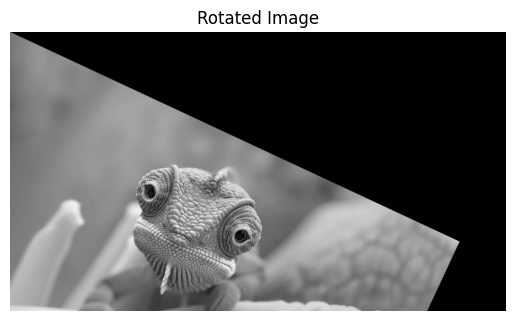

In [48]:
def rotate_image(image, angle):
  rows, cols = image.shape
  angle_rad = np.deg2rad(angle)
  rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad), 0],
  [np.sin(angle_rad), np.cos(angle_rad),0],
  [0, 0, 1]], dtype=np.float32)
  rotated_image = cv2.warpPerspective(image, rotation_matrix, (cols,rows))
  return rotated_image
# Apply rotation
rotated_image = rotate_image(image4, angle=25)
plt.imshow(rotated_image, cmap='gray')
plt.title('Rotated Image')
plt.axis('off')
plt.show()

## Shearing


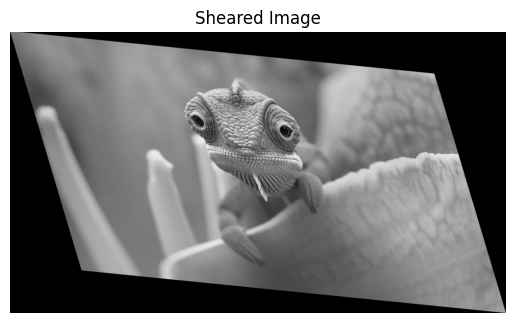

In [49]:
def shear_image(image, shx, shy):
  rows, cols = image.shape
  shearing_matrix = np.array([[1, shx, 0],
  [shy, 1, 0],
  [0, 0, 1]], dtype=np.float32)
  sheared_image = cv2.warpPerspective(image, shearing_matrix, (cols + int(abs(shx * rows)), rows + int(abs(shy * cols))))
  return sheared_image
# Apply shearing
sheared_image = shear_image(image4, shx=0.3, shy=0.1)
plt.imshow(sheared_image, cmap='gray')
plt.title('Sheared Image')
plt.axis('off')
plt.show()

### Perform Transformation using the OpenCV library.

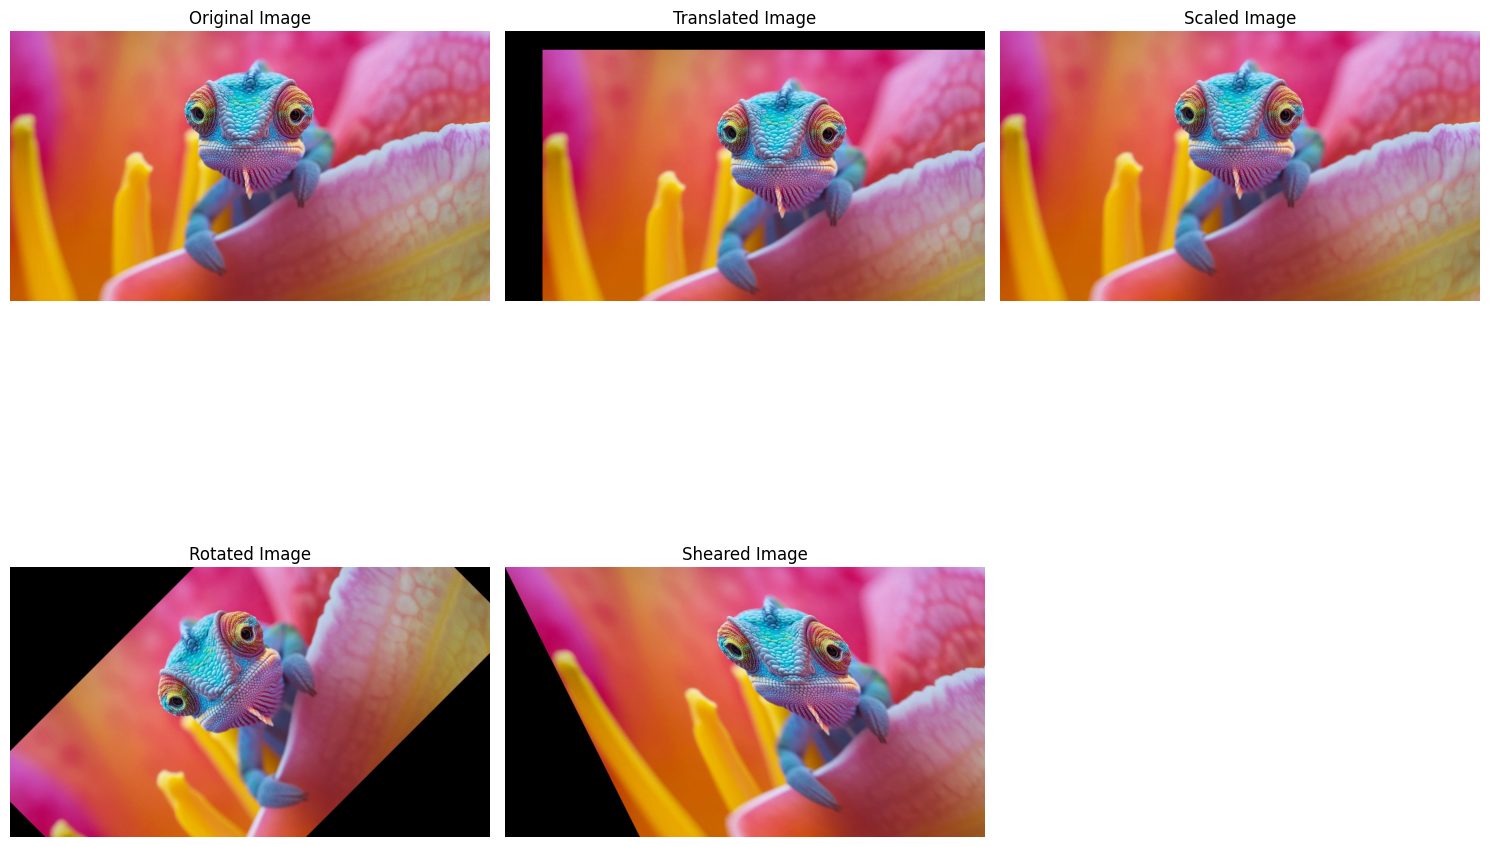

In [50]:
# Load the image
image = cv2.imread('/content/img.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get image dimensions
height, width = image.shape[:2]

# -------------------- 1. Translation --------------------
# Translation matrix (Tx, Ty)
Tx, Ty = 100, 50
translation_matrix = np.float32([[1, 0, Tx], [0, 1, Ty]])

# Apply translation
translated_image = cv2.warpAffine(image, translation_matrix, (width, height))

# -------------------- 2. Scaling --------------------
# Scaling factors (Sx, Sy)
Sx, Sy = 1.5, 1.5
scaled_image = cv2.resize(image, None, fx=Sx, fy=Sy)

# -------------------- 3. Rotation --------------------
# Rotation matrix (angle)
angle = 45  # Rotate 45 degrees
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)  # Rotate around the center

# Apply rotation
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

# -------------------- 4. Shearing --------------------
# Shearing matrix (shear factors in X and Y directions)
Sh_x, Sh_y = 0.5, 0.0  # Shear in the X direction
shearing_matrix = np.float32([[1, Sh_x, 0], [Sh_y, 1, 0]])

# Apply shearing
sheared_image = cv2.warpAffine(image, shearing_matrix, (width, height))

# -------------------- Display results --------------------
# Plotting all images
plt.figure(figsize=(15, 12))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Translated Image
plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
plt.title('Translated Image')
plt.axis('off')

# Scaled Image
plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title('Scaled Image')
plt.axis('off')

# Rotated Image
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')
plt.axis('off')

# Sheared Image
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(sheared_image, cv2.COLOR_BGR2RGB))
plt.title('Sheared Image')
plt.axis('off')

plt.tight_layout()
plt.show()
